In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from vmdpy import VMD

import consts as CONSTS
import utils as UTILS
# import hydronet as NET
import datamanager as DataManager

I:\Anaconda3\envs\hhx\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
I:\Anaconda3\envs\hhx\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
I:\Anaconda3\envs\hhx\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# load data
train_test_ratio = 0.8
train_set = DataManager.HydroDataset('norm_data.npy', is_training=True, train_test_ratio=train_test_ratio)
test_set = DataManager.HydroDataset('norm_data.npy', is_training=False, train_test_ratio=train_test_ratio)

In [58]:
input, output = test_set[0]

torch.Size([540, 14]) 0 torch.Size([19, 14])


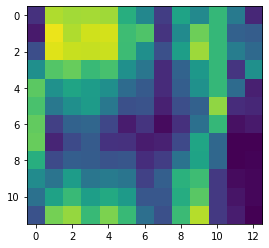

In [59]:
plt.imshow(input, vmin=0, vmax=1)

In [3]:
input, _ = torch.load('test_vmd.pth')

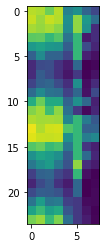

In [5]:
plt.imshow(input, vmin=0, vmax=1)

In [6]:
input[:,-1]

tensor([0.2130, 0.3560, 0.1250, 0.1310, 0.1080, 0.0450, 0.0190, 0.0480, 0.1235,
        0.2235, 0.0935, 0.1095, 0.2760, 0.3200, 0.4665, 0.0895, 0.1095, 0.0760,
        0.0115, 0.0170, 0.0235, 0.0255, 0.0095, 0.0125])

In [12]:
# #. Time Domain 0 to T  
# T = 12
# fs = 1/T  
# t = np.arange(1,T+1)/T  
# freqs = 2*np.pi*(t-0.5-fs)/(fs)  

# #. center frequencies of components  
# f_1 = 2  
# f_2 = 24  
# f_3 = 288  

# #. modes  
# v_1 = (np.cos(2*np.pi*f_1*t))  
# v_2 = 1/4*(np.cos(2*np.pi*f_2*t))  
# v_3 = 1/16*(np.cos(2*np.pi*f_3*t))  

# f = v_1 + v_2 + v_3 + 0.1*np.random.randn(v_1.size)  

f = input[:,-1].numpy()

#. some sample parameters for VMD  
alpha = 2000       # moderate bandwidth constraint  
tau = 0.            # noise-tolerance (no strict fidelity enforcement)  
K = 8              # 3 modes  
DC = 0             # no DC part imposed  
init = 1           # initialize omegas uniformly  
tol = 1e-7  


#. Run actual VMD code  
u, u_hat, omega = VMD(f, alpha, tau, K, DC, init, tol)
u = torch.from_numpy(u)

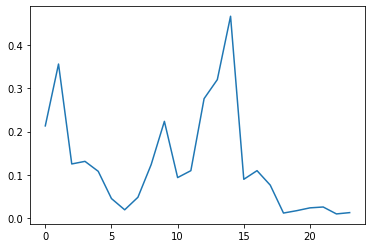

In [13]:
plt.plot(f)

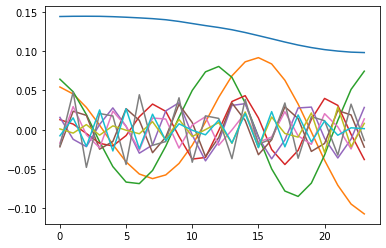

In [14]:
for i in u:
    plt.plot(i)

In [19]:
input = torch.hstack((input, u.transpose(0,1)))
input.shape

torch.Size([24, 18])

In [20]:
u.shape

torch.Size([10, 24])

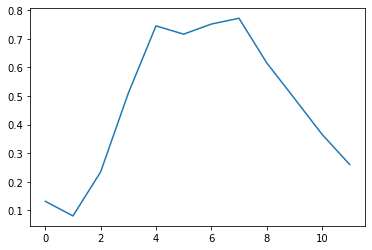

In [65]:
k = 0
k = torch.tensor(u).sum(dim=0)
plt.plot(k)

In [76]:
def RMSE(yhat, y):
    return torch.sqrt(torch.mean((yhat - y) ** 2))

In [79]:
def MAPE(yhat, y):
    return torch.mean(torch.abs((yhat - y) / y))

In [82]:
def NSE(yhat, y):
    return (torch.sum((yhat - y)**2) / torch.sum((y - torch.mean(y)) ** 2))

In [83]:
RMSE(input[:,0], input[:,1]), MAPE(input[:,0], input[:,1]), NSE(input[:,0], input[:,1])

(tensor(0.5274), tensor(1.3949), tensor(3.2521))

In [84]:
RMSE(input[:,2], input[:,1]), MAPE(input[:,2], input[:,1]), NSE(input[:,2], input[:,1])

(tensor(0.0934), tensor(0.2895), tensor(0.1019))

In [85]:
RMSE(input[:,2]*100, input[:,1]*100), MAPE(input[:,2]*100, input[:,1]*100), NSE(input[:,2]*100, input[:,1]*100)

(tensor(9.3360), tensor(0.2895), tensor(0.1019))

In [90]:
import random
import numpy as np
a = [random.randint(0, 100) for t in range(20)]
b = [random.randint(0, 100) for t in range(20)]
# 先构造一个矩阵
ab = np.array([a, b])

from scipy.stats import pearsonr
# 计算协方差矩阵
print(pearsonr(a, b))

(0.1615731956727025, 0.496160104981141)


In [ ]:
np.corrcoef()

In [91]:
a =torch.rand([4,1,12,13])

In [92]:
conv = torch.nn.Conv2d(1, 5, (1,13))
conv(a).shape

torch.Size([4, 5, 12, 1])

In [2]:
import csv

In [2]:
zt = torch.load('zt.pth')

In [3]:
xy = torch.load('xy.pth')

In [30]:
minmax = torch.vstack(
    (
zt.min(dim=0).values,
zt.max(dim=0).values,
xy.min(dim=0).values,
xy.max(dim=0).values
    )
)

In [31]:
minmax = torch.vstack(
    (
minmax.min(dim=0).values,
minmax.max(dim=0).values
    )
)
minmax

tensor([[ 9.4060e+02, -1.2500e+01, -7.0000e+00, -1.7700e+01,  1.0000e-01,
          0.0000e+00,  0.0000e+00,  9.0000e-01,  0.0000e+00, -1.1400e+01,
         -1.2000e+00, -1.9900e+01,  4.0000e-01],
        [ 9.9250e+02,  3.3900e+01,  4.0500e+01,  2.8700e+01,  1.0000e+00,
          1.4080e+02,  1.0300e+01,  2.1000e+01,  1.3600e+01,  4.1800e+01,
          6.8200e+01,  2.9000e+01,  2.9300e+03]])

In [32]:
minmax.transpose(0,1).tolist()

[[940.5999755859375, 992.5],
 [-12.5, 33.900001525878906],
 [-7.0, 40.5],
 [-17.700000762939453, 28.700000762939453],
 [0.10000000149011612, 1.0],
 [0.0, 140.8000030517578],
 [0.0, 10.300000190734863],
 [0.8999999761581421, 21.0],
 [0.0, 13.600000381469727],
 [-11.399999618530273, 41.79999923706055],
 [-1.2000000476837158, 68.19999694824219],
 [-19.899999618530273, 29.0],
 [0.4000000059604645, 2930.0]]

In [7]:
xy_norm = UTILS.normalize_01_data(xy.clone())

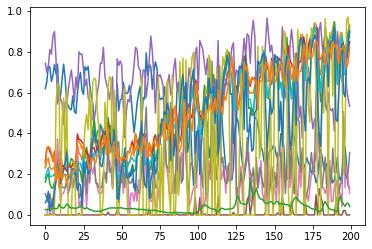

In [15]:
for i in range(xy_norm.shape[1]):
    plt.plot(xy_norm[:200,i])

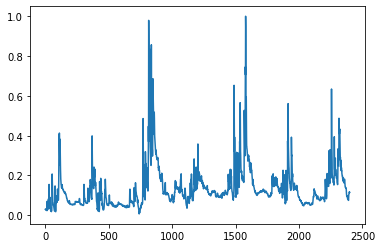

In [64]:
plt.plot(torch.pow(xy_norm[6000:,-1], 0.5))

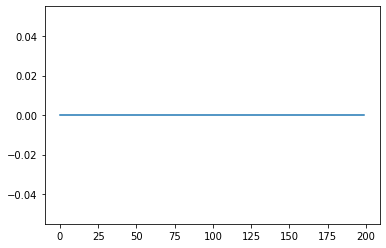

In [26]:
plt.plot(torch.clip(xy_norm[:200,-1], -1, 0))

In [27]:
for i in xy_norm[:200,-1]:
    if i < 0:
        print(i)

In [29]:
xy[:,12].min()

tensor(0.4000)

In [103]:
import math

params = {torch.tensor([0.]): torch.tensor([0.])}

LR = 5e-3
EPOCHS = 200

optimizer = torch.optim.Adam(params, lr=LR)

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lambda a : (math.cos(a * 5 * math.pi / EPOCHS) * 0.9 + 1.1) / 2)

lrs = []
for i in range(EPOCHS):
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

I:\Anaconda3\envs\hhx\lib\site-packages\torch\optim\lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


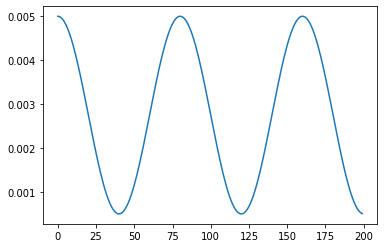

In [104]:
plt.plot(lrs)

In [68]:
lrs[-1]

8.973442145776275e-05

In [106]:
input = torch.rand([5, 30, 13])

In [107]:
input = input[:,None,:,:]

In [116]:
conv = nn.Conv2d(1, 7, (3, 13), padding=(1,0))

In [117]:
output = conv(input)
output.shape

torch.Size([5, 7, 30, 1])

In [ ]:
def conv(in_channels, out_channels, in_):
    conv = nn.Conv2d(1, out_channels, (3, in_channels), padding=(1,0))
    